In [653]:
import matplotlib.pyplot as plt #graficos
import numpy as np #matrices
import cv2 #procesamiento de imagenes
from scipy import stats
import glob



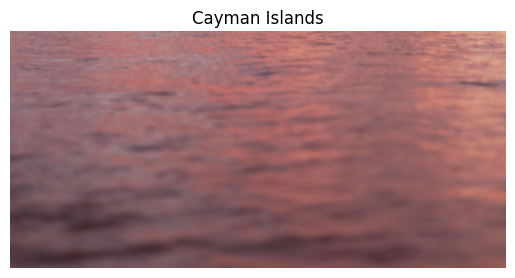

In [654]:
#subir imagen
imagen="Cayman Islands"   
archivo = glob.glob(imagen + ".*")[0]
img = cv2.imread(archivo)
imagen1=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imagen1)
plt.title(imagen)
plt.axis("off")
plt.show()

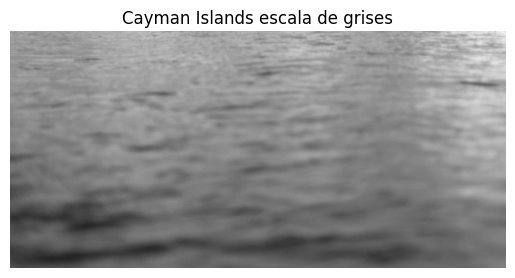

In [655]:
#transformar imagen a escala de grises
imagengris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imagengris, cmap="gray")
plt.title(imagen+" escala de grises")
plt.axis("off")
plt.show()

HISTOGRAMA

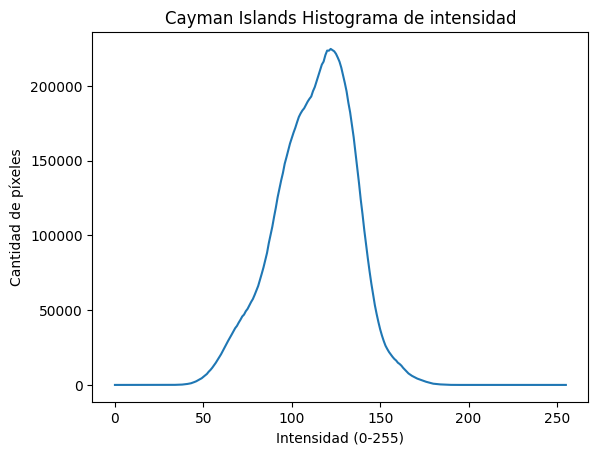

In [656]:
#convertir float/decimal a entero 0-255
Imagen1gris = imagengris.astype(np.uint8)
#crear arreglo de intensidades
histograma = np.zeros(256, dtype=int)
# recorrer pixeles de la imagen
for fila in Imagen1gris:
    for pixel in fila:
        #clasificar intensidad del pixel
        histograma[pixel] += 1

#graficar
plt.plot(histograma)
plt.title(imagen+" Histograma de intensidad")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Cantidad de píxeles")
plt.show()

FUNCION DE DENSIDAD DE PROBABILIDAD

Probabilidad entre 50 y 120 = 0.6007419849265528


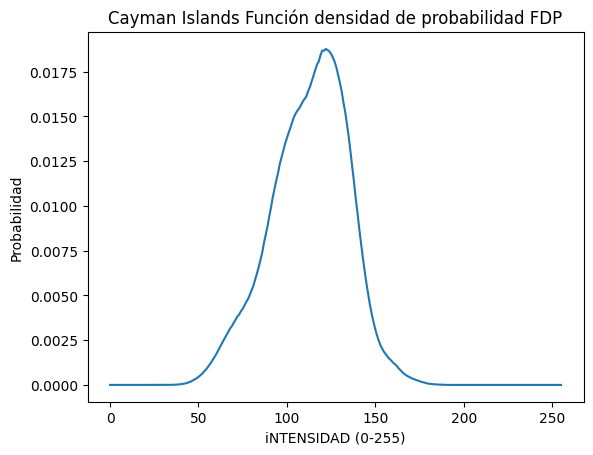

In [657]:
#numero total de pixeles
total_pixeles = Imagen1gris.size
#normalizar histograma
FDP = histograma / total_pixeles
#intervalo
a = 50
b = 120
# área bajo la curva: probabilidad entre a y b del pixel
area = np.sum(FDP[a:b+1])
print("Probabilidad entre", a, "y", b, "=", area)

#mostrar
plt.plot(FDP)
plt.title(imagen+" Función densidad de probabilidad FDP")
plt.xlabel("iNTENSIDAD (0-255)")
plt.ylabel("Probabilidad")
plt.show()

FUNCION DE DISTRIBUCION ACUMULADA

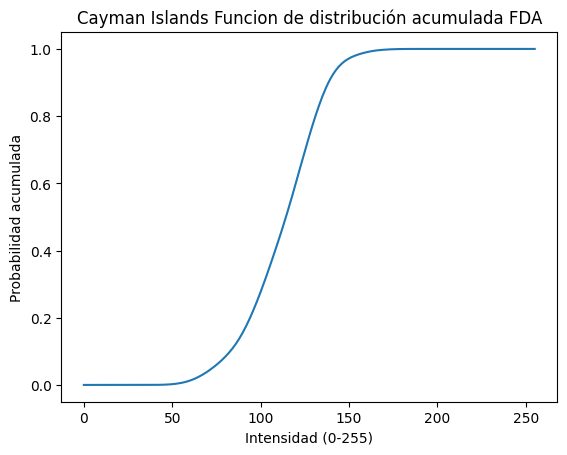

In [ ]:
#funcion cumular
FDA = np.cumsum(FDP)

#mostrar
plt.plot(FDA)
plt.title(imagen+" Funcion de distribución acumulada FDA")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Probabilidad acumulada")
plt.show()


PRUEBAS ESTADISTICAS DE NORMALIDAD

Shapiro Wilk

In [659]:
# Convertir imagen en vector unidimensional
pixeles = imagengris.flatten()

# Shapiro-Wilk  scipy limitar a 5000 pixeles
stat, p = stats.shapiro(pixeles[:5000])

print("Estadístico W:", stat)
print("p-valor:", p)

if p > 0.05:
    print("No se rechaza H0 → distribucion normal")
else:
    print("Se rechaza H0 → distribucion NO normal")

Estadístico W: 0.9485528986174905
p-valor: 1.1022954404523789e-38
Se rechaza H0 → distribucion NO normal


Kolmogorov Smirnov

In [660]:
# Convertir imagen en vector unidimensional
pixeles = imagengris.flatten()
# Normalizamr datos 
pixelnormal = (pixeles - np.mean(pixeles)) / np.std(pixeles)
# funcion kolmogorov-smirnov
stat, p = stats.kstest(pixelnormal, 'norm')

print("KS Estadistico:", stat)
print("p-valor:", p)

if p > 0.05:
    print("No se rechaza H0 → distribucion normal")
else:
    print("Se rechaza H0 → distribucion NO normal")


KS Estadistico: 0.0455908970822515
p-valor: 0.0
Se rechaza H0 → distribucion NO normal
